In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum((x1-x2)**2))
    return distance

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.538516,0.5,0.640312,0.141421,0.5,0.509902,0.141421,0.921954,0.447214,...,1.649242,1.843909,1.063015,1.726268,1.612452,1.676305,1.56205,1.486607,1.104536,0.943398
1,0.538516,0.0,0.282843,0.316228,0.608276,1.029563,0.5,0.412311,0.509902,0.1,...,1.802776,2.002498,0.948683,1.910497,1.824829,1.8,1.486607,1.6,1.360147,1.0
2,0.5,0.282843,0.0,0.141421,0.5,0.989949,0.223607,0.360555,0.424264,0.223607,...,2.002498,2.202272,1.208305,2.1,2.002498,2.009975,1.746425,1.811077,1.513275,1.216553
3,0.640312,0.316228,0.141421,0.0,0.640312,1.131371,0.3,0.5,0.282843,0.3,...,2.1,2.3,1.264911,2.202272,2.109502,2.10238,1.802776,1.90263,1.627882,1.30384
4,0.141421,0.608276,0.5,0.640312,0.0,0.5,0.447214,0.2,0.921954,0.509902,...,1.772005,1.964688,1.204159,1.843909,1.726268,1.802776,1.702939,1.615549,1.216553,1.081665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.676305,1.8,2.009975,2.10238,1.802776,1.581139,2.137756,1.746425,2.302173,1.802776,...,0.1,0.223607,0.948683,0.223607,0.3,0.0,0.640312,0.2,0.640312,0.8
146,1.56205,1.486607,1.746425,1.802776,1.702939,1.664332,1.923538,1.581139,1.941649,1.523155,...,0.72111,0.848528,0.538516,0.860233,0.894427,0.640312,0.0,0.538516,0.905539,0.640312
147,1.486607,1.6,1.811077,1.90263,1.615549,1.421267,1.941649,1.552417,2.10238,1.603122,...,0.223607,0.412311,0.761577,0.360555,0.360555,0.2,0.538516,0.0,0.5,0.6
148,1.104536,1.360147,1.513275,1.627882,1.216553,0.943398,1.6,1.2,1.868154,1.334166,...,0.583095,0.761577,0.806226,0.632456,0.509902,0.640312,0.905539,0.5,0.0,0.5


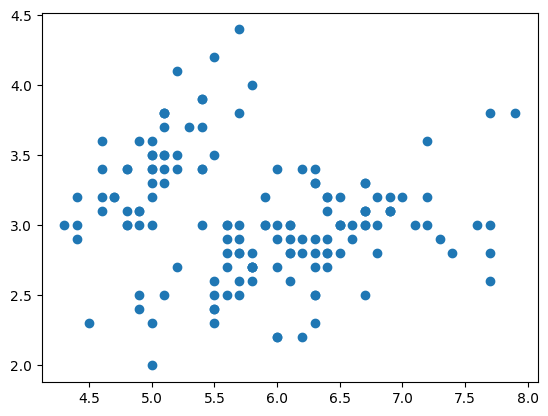

In [3]:
iris_df=pd.read_csv('./iris.csv')
iris_df=iris_df[['sepal.length','sepal.width','variety']]

plt.scatter(x=iris_df['sepal.length'],y=iris_df['sepal.width'])

pairwise_distances=pd.DataFrame(columns=iris_df.index,index=iris_df.index)
#Go through each point and find it's distance with another point and place it in the pairwise_distances Dataframe
for i in pairwise_distances.columns:
    for j in pairwise_distances.index:
        pairwise_distances.loc[i,j]=euclidean_distance(iris_df.loc[i].drop(['variety']).to_numpy(),iris_df.loc[j].drop(['variety']).to_numpy())

display(pairwise_distances)

In [4]:
#Returns the nodes and edges of the MST
def get_MST(edge_weights):
    #Start out with the first node
    mstNodes={0}
    #All nodes that are yet to be visited
    unvisitedNodes=set(range(0,edge_weights.shape[0]))-mstNodes
    mstEdges=[]
    
    #If everything is visited then stop the loop
    while(len(unvisitedNodes)!=0):
        min_weight_edges=[]
        for i in range(len(mstNodes)):
            min_weight_edges.append((0,0,-1))
        i=0
        #for each node in mstNodes find the node in unvisitedNodes where the distances to be covered is minimum
        #Here all unvisitedNodes are considered because technically you can get to any node in this graph from any other node
        for nodeA in mstNodes:
            for nodeB in unvisitedNodes:
                if(min_weight_edges[i][2]==-1):
                    min_weight_edges[i]=(nodeA,nodeB,edge_weights.loc[nodeA,nodeB])
                elif(min_weight_edges[i][2]>edge_weights.loc[nodeA,nodeB]):
                    min_weight_edges[i]=(nodeA,nodeB,edge_weights.loc[nodeA,nodeB])
            i+=1
        min_edge=(0,0,-1)

        #After getting the minimum distance edges for all nodes in mstNodes, go through them and find the smallest one of all
        for edge in min_weight_edges:
            if(min_edge[2]==-1):
                min_edge=edge
            elif(min_edge[2]>edge[2]):
                min_edge=edge
        
        #Add it to mstNodes and mstEdges if it is not already there in mstNodes
        #Also update unvisitedNodes array to exclude that minimum edge
        if(min_edge[1] not in mstNodes):
            mstNodes.add(min_edge[1])
            mstEdges.append((int(min_edge[0]),int(min_edge[1]),int(min_edge[2])))
            unvisitedNodes=unvisitedNodes-mstNodes
    return [mstNodes,mstEdges]

#Checks through all the edges in the Graph and remove the first n longest ones
def remove_largest_edge(mstEdges,num_edges=1):
    for _ in range(num_edges):
        max=(0,0,-1)
        for edge in mstEdges:
            if(max[2]<edge[2]):
                max=edge
        mstEdges.remove(max)
    return mstEdges

Total Number of Edges: 147


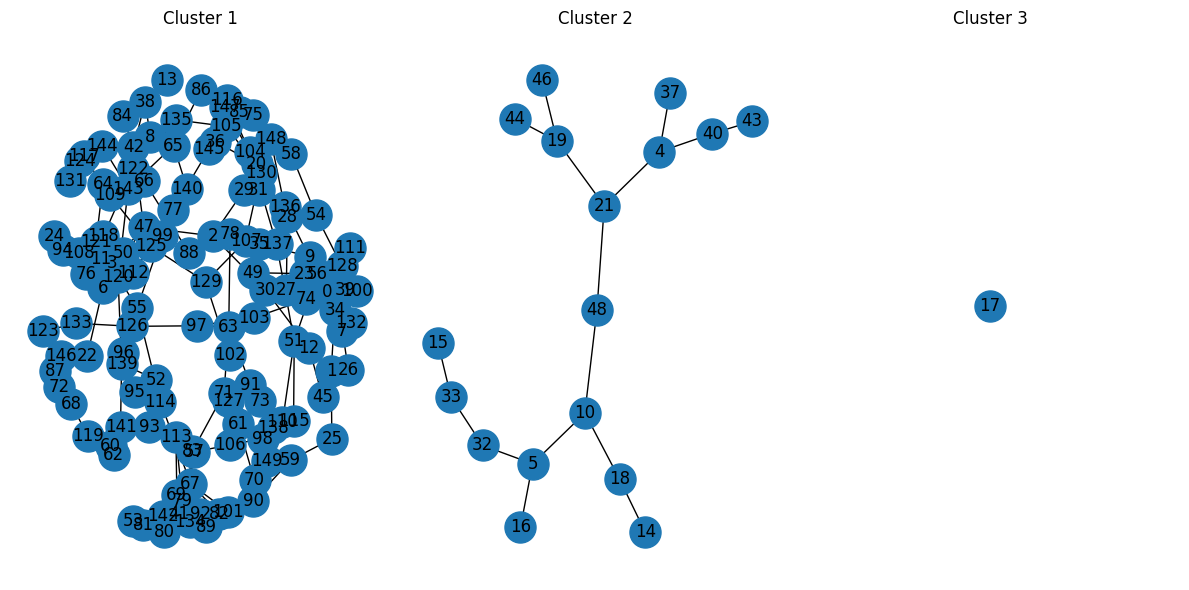

In [5]:
mstNodes,mstEdges=get_MST(pairwise_distances)
mstEdges=remove_largest_edge(mstEdges,2)

G=nx.Graph()
G.add_nodes_from(mstNodes)
for edge in mstEdges:
    G.add_edge(edge[0],edge[1])

# print(nx.is_connected(G))
# print(nx.is_tree(G))
print("Total Number of Edges:",len(mstEdges))

components = list(nx.connected_components(G))
plt.figure(figsize=(12, 6))

#Plotting each component of the graph
for i, component in enumerate(components):
    subgraph = G.subgraph(component)
    pos = nx.spring_layout(subgraph, k=0.5,iterations=100)
    plt.subplot(1, len(components), i + 1)
    nx.draw(subgraph, pos, with_labels=True, node_size=500)
    plt.title(f'Cluster {i + 1}')

plt.tight_layout()
plt.show()


# for i in components[0]:
#     print(iris_df.loc[i]['variety'])
# for i in components[1]:
#     print(iris_df.loc[i]['variety'])
# for i in components[2]:
#     print(iris_df.loc[i]['variety'])

***NOTE:*** Cluster 1 looks jumbled because that is the way that networkx renders graphs. (I can assure you that it is a Tree)